<a href="https://colab.research.google.com/github/JoDeMiro/Statistics/blob/main/Python_Statistics_03_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://youtu.be/XKMVxBlGFT8

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
def create_data(func, sample_size, std):
  x = np.linspace(0, 1, sample_size).reshape(-1, 1)
  t = func(x) + np.random.normal(scale = std, size = x.shape)
  return x, t

In [ ]:
def sinus_function(x):
  return np.sin(2 * np.pi * x)

def polynomial_function(x):
  return (12.0 + 6.14 * x - 8.4 * x * x)

def exponential_function(x):
  return (1 + 1 * np.exp(0.001 * x))

def linear_function(x):
  return (1.17 + 3.14 * x)

def discountinous_function(x):
  return [1.0 if i > 0.5 else 0.0 for i in x]

In [ ]:
size = 10
sigma = 0.3
np.random.seed(1234)

## Data generated by linear function + noise

In [ ]:
x_train, y_train = create_data(linear_function, size, sigma)

In [ ]:
x_predict = np.linspace(0, 1, 100).reshape(-1, 1)

In [ ]:
y_true = linear_function(x_predict)

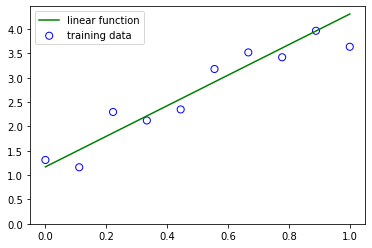

In [ ]:
plt.scatter(x_train, y_train, facecolor = 'none', edgecolor = 'b', s = 50, label = 'training data')
plt.plot(x_predict, y_true, c = 'g', label = 'linear function')
plt.ylim(bottom = 0.0)
plt.legend()
plt.show()

## Polynomial features: $ 1 + x + x^{2}$

In [ ]:
feature = PolynomialFeatures(degree = 1)

In [ ]:
y_train.shape

(10, 1)

In [ ]:
x_train.shape

(10, 1)

In [ ]:
feature.fit_transform(x_train)

array([[1.        , 0.        ],
       [1.        , 0.11111111],
       [1.        , 0.22222222],
       [1.        , 0.33333333],
       [1.        , 0.44444444],
       [1.        , 0.55555556],
       [1.        , 0.66666667],
       [1.        , 0.77777778],
       [1.        , 0.88888889],
       [1.        , 1.        ]])

In [ ]:
# ez tulajdonképpen egy mátrix 2x10, ahol az első oszlop konstans (1)

In [ ]:
feature = PolynomialFeatures(degree = 2)

In [ ]:
feature.fit_transform(x_train)

array([[1.        , 0.        , 0.        ],
       [1.        , 0.11111111, 0.01234568],
       [1.        , 0.22222222, 0.04938272],
       [1.        , 0.33333333, 0.11111111],
       [1.        , 0.44444444, 0.19753086],
       [1.        , 0.55555556, 0.30864198],
       [1.        , 0.66666667, 0.44444444],
       [1.        , 0.77777778, 0.60493827],
       [1.        , 0.88888889, 0.79012346],
       [1.        , 1.        , 1.        ]])

In [ ]:
# egy sor egy eset, az első oszlop a konstans, a másoidik az x, a haramadik az x^2

## Solving for $w$ using closed-form solution of OLS (Ordinary Least Squares)

$$ w = {(X^TX)^{-1}X^T}t $$

Hogyan oldjuk ezt meg, hogyan keressük meg a minimumát?
Ahol a hiba függvény minimumának a deriváltja nulla, ott lesz a minimuma.

In [ ]:
feature = PolynomialFeatures(degree = 1)

X_train = feature.fit_transform(x_train)

X_train

array([[1.        , 0.        ],
       [1.        , 0.11111111],
       [1.        , 0.22222222],
       [1.        , 0.33333333],
       [1.        , 0.44444444],
       [1.        , 0.55555556],
       [1.        , 0.66666667],
       [1.        , 0.77777778],
       [1.        , 0.88888889],
       [1.        , 1.        ]])

In [ ]:
w = np.linalg.inv(X_train.transpose().dot(X_train)).dot(X_train.transpose()).dot(y_train)

w

array([[1.30036632],
       [2.79305726]])

Az eredeti függvényünk így nézett ki $ 1.17 + 3.14 * x $ mégis amit a fenti számítás alapján kaptunk az nem pontosan ez. **Miért?**

```
x_train, y_train = create_data(linear_function, size, sigma)

def linear_function(x):
  return (1.17 + 3.14 * x)
```







In [ ]:
y_train

array([[1.31143055],
       [1.16159618],
       [2.29758987],
       [2.1228711 ],
       [2.34937894],
       [3.18059333],
       [3.52120986],
       [3.42126517],
       [3.96582002],
       [3.63719451]])

Természetesen azért mert az `y_train` adatok létrehozásakor nem pontosan a fenti függvényt alkalmaztuk $ 1.17 + 3.14 * x $, hanem hozzáadtuk valamennyi zajd méghozzá normál eloszlás szerint ha jól emlékszem 0.3 szigmával.

Ha lenne egy olyan `y_train` (vagy ez esetben legyen most `y_perfect)` adatunk,
amihez nem adunk hozzá véletlen szerűséget, akkor a számításunk a következő képen néne ki.

In [ ]:
x_train, y_perfect = create_data(linear_function, size, 0)

In [ ]:
y_perfect

array([[1.17      ],
       [1.51888889],
       [1.86777778],
       [2.21666667],
       [2.56555556],
       [2.91444444],
       [3.26333333],
       [3.61222222],
       [3.96111111],
       [4.31      ]])

In [ ]:
w = np.linalg.inv(X_train.transpose().dot(X_train)).dot(X_train.transpose()).dot(y_perfect)

w

array([[1.17],
       [3.14]])

## Woala

$ 1.17 + 3.14 * x $, az így kapott számítás tökéletesen megegyezik, de **miért** is?

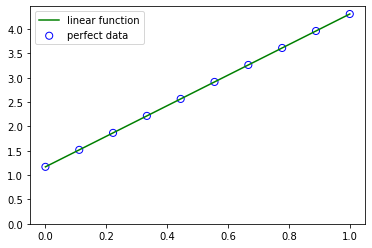

In [ ]:
plt.scatter(x_train, y_perfect, facecolor = 'none', edgecolor = 'b', s = 50, label = 'perfect data')
plt.plot(x_predict, y_true, c = 'g', label = 'linear function')
plt.ylim(bottom = 0.0)
plt.legend()
plt.show()

Röviden és előzetesen: Ha eljutunk odáig, hogy kiszámoljuk a hibatagokat, akkor kiderül, hogy ez esetben a *hibatagok négyzetösszege* **0**.

Nézzük meg lépésenként.

In [ ]:
# w = np.linalg.inv(X_train.transpose().dot(X_train)).dot(X_train.transpose()).dot(y_train)

X_train.transpose()

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]])

In [ ]:
# w = np.linalg.inv(X_train.transpose().dot(X_train)).dot(X_train.transpose()).dot(y_train)

X_train.transpose().dot(X_train)

array([[10.        ,  5.        ],
       [ 5.        ,  3.51851852]])

In [ ]:
# w = np.linalg.inv(X_train.transpose().dot(X_train)).dot(X_train.transpose()).dot(y_train)

np.linalg.inv(X_train.transpose().dot(X_train))

array([[ 0.34545455, -0.49090909],
       [-0.49090909,  0.98181818]])

In [ ]:
# w = np.linalg.inv(X_train.transpose().dot(X_train)).dot(X_train.transpose()).dot(y_train)

np.linalg.inv(X_train.transpose().dot(X_train)).dot(X_train.transpose())

array([[ 0.34545455,  0.29090909,  0.23636364,  0.18181818,  0.12727273,
         0.07272727,  0.01818182, -0.03636364, -0.09090909, -0.14545455],
       [-0.49090909, -0.38181818, -0.27272727, -0.16363636, -0.05454545,
         0.05454545,  0.16363636,  0.27272727,  0.38181818,  0.49090909]])

In [ ]:
# w = np.linalg.inv(X_train.transpose().dot(X_train)).dot(X_train.transpose()).dot(y_train)

np.linalg.inv(X_train.transpose().dot(X_train)).dot(X_train.transpose()).dot(y_train)

array([[1.30036632],
       [2.79305726]])

## Bizonyára van ennek egy egyszerűbb megoldása is.

Természetesen Pythonban számos könyvtárat írtak ennek a feladatnak a megoldására, de én itt most a **scikit-learn** könyvtár általt használt megoldást fogom bemutatni.

In [ ]:
model = LinearRegression(fit_intercept = False)

model.fit(X_train, y_train)

model.coef_

array([[1.30036632, 2.79305726]])

## Láthatjuk, hogy a coeficiensek ugyan azok mint a korábbi számításunk alapján.

A scikit-learn könyvtár egyébként még számos más machine-learning algoritmust is tartalmaz, de felépítésében és használatában mindegyik egy alapvető konvenciót követ.

A `LinearRegression()` ez esetben egy olyan objektum aminek van egy `.fit` methodusa
aminek a szignatúrájában minimum két paramétert vár. Egy X mátrixot és egy Y vektort.

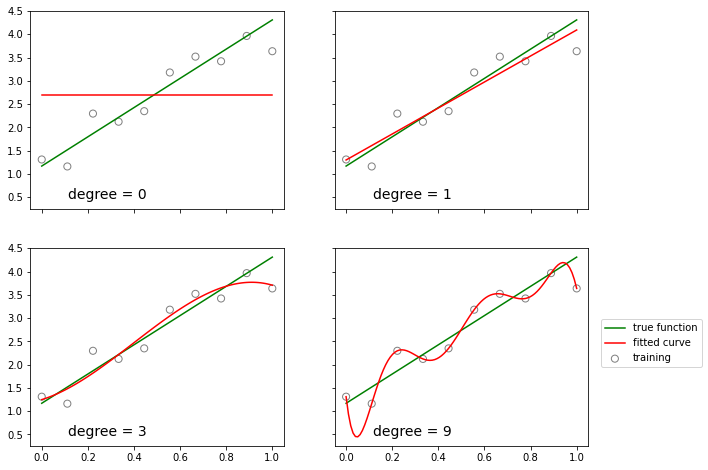

In [ ]:
fig, ax = plt.subplots(2, 2, sharex = True, sharey = True, figsize = (10, 8))
axes = ax.flatten()

# iterjálunk végig az 0-ad, 1-ed, 3-ad, 9-ed rendű polinomiális függvényeken
for i, degree in enumerate([0, 1, 3, 9]):
  ax = axes[i]
  feature = PolynomialFeatures(degree)
  X_train = feature.fit_transform(x_train)
  X_predict = feature.fit_transform(x_predict)

  model = LinearRegression(fit_intercept = False)
  model.fit(X_train, y_train)
  
  y_predict = model.predict(X_predict)

  ax.scatter(x_train, y_train, facecolor = 'none', edgecolors = 'gray', s = 50, label = 'training')
  ax.plot(x_predict, y_true, c = 'g', label = 'true function')
  ax.plot(x_predict, y_predict, c = 'r', label = 'fitted curve')
  ax.annotate('degree = {}'.format(degree), xy = (0.15, 0.05), xycoords = 'axes fraction', fontsize = 14)

plt.legend(bbox_to_anchor = (1.05, 0.64), loc = 2, borderaxespad = 0.0)

plt.show()

## Magyarázat

Amikor a degree = 0 akkor csak a konstans értéket vesszük figyelembe (ami 1)<br>
Amkior a degree = 1 akkor a konstansé és az X<br>

## Összefoglalva

Az sem jó, ha túlillesztjük a modellt, mert akkor a nem tudunk általános következtetéseket levonni a modellünkből.

## Ennek a bemutatására szolgál a következő módszer

In [ ]:
from sklearn.model_selection import ShuffleSplit, KFold, train_test_split
from sklearn.metrics import mean_squared_error

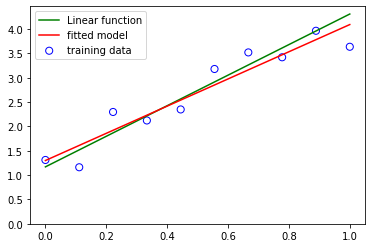

array([[1.30036632, 2.79305726]])

In [ ]:
# állítsuk be a véletlenszám generátort
np.random.seed(1234)

# hozzunk létre adatokat a linear_function alapján
x_train, y_train = create_data(linear_function, size, sigma)
x_predict = np.linspace(0, 1, 100).reshape(-1, 1)
y_true = linear_function(x_predict)

# ábrázoljuk az egyes esetekhez tartozó adatokat x,y koordinátával pontok formájában
plt.scatter(x_train, y_train, facecolor = 'none', edgecolor = 'b', s = 50, label = 'training data')
plt.plot(x_predict, y_true, c = 'g', label = 'Linear function')

# transzformáljuk az adatokat 2x10-es mátrix formátumba
feature = PolynomialFeatures(degree = 1)
X_train = feature.fit_transform(x_train)
X_predict = feature.fit_transform(x_predict)

# készítsük el az OLS illesztést
model = LinearRegression(fit_intercept = False)
model.fit(X_train, y_train)
y_predict = model.predict(X_predict)

# ábrázoljuk a modell álltal kiszámolt értékekekt
plt.plot(x_predict, y_predict, c = 'r', label = 'fitted model')

plt.ylim(bottom = 0.0)
plt.legend()
plt.show()

# nézzük meg a modell együtthatóit (y = w1 * Bias + w2 * X)
model.coef_

## Eddig szemléltetés céljából kevés (10) adattal dolgoztunk.

Most növeljük a megfigyelési eseteket

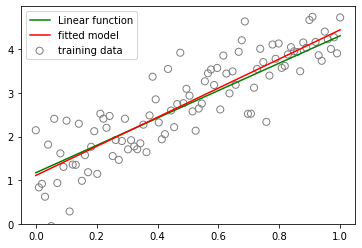

array([[1.10709631, 3.3385068 ]])

In [ ]:
np.random.seed(1)

size = 100

sigma = 0.6

x_train, y_train = create_data(linear_function, size, sigma)
x_predict = np.linspace(0, 1, 100).reshape(-1, 1)
y_true = linear_function(x_predict)

plt.scatter(x_train, y_train, facecolor = 'none', edgecolor = 'gray', s = 50, label = 'training data')
plt.plot(x_predict, y_true, c = 'g', label = 'Linear function')

feature = PolynomialFeatures(degree = 1)
X_train = feature.fit_transform(x_train)
X_predict = feature.fit_transform(x_predict)

model = LinearRegression(fit_intercept = False)
model.fit(X_train, y_train)
y_predict = model.predict(X_predict)

plt.plot(x_predict, y_predict, c = 'r', label = 'fitted model')

plt.ylim(bottom = 0.0)
plt.legend()
plt.show()

model.coef_

## Vegyünk mintát ebből a 100 esetből

És utána nézzük meg, hogy az így vett mintákon végzett OLS regressziós modell milyen eredményeket fog adni. Arra számítunk, hogy kisebb nagyobb eltéréseket fogunk tapasztalni.

In [ ]:
shuffled_indeces = np.arange(0, size)
np.random.shuffle(shuffled_indeces)

print(shuffled_indeces)

[95 67 96 71  1 80 99 45 52 27 97 63 91 70 43 11 46 94 21 89 61 36 57 90
 58  9 12 18 29 16 51 25  6 13 69 22 88 40 35 56 76 73  0  4 17 59 66 62
 98 10 42 65 23 49 75  5 39 68 38 87 37 81 78  3 72 85 34 60 47 53  7 26
 19 14 30 15 44 20 24 64 41 79 50 77 86 93  8 74 92 31 82 55 28 32 54 48
 83 84  2 33]


## Osszuk 10 egyenlő részre az eredetileg 100 esetből álló mintánkat.

Méghozzá úgy, hogy véletlen szerűen veszünk 10 esetet.

In [ ]:
for start in np.arange(0, size-1, 10):
  stop = start + 9
  print(start, stop, '\t', shuffled_indeces[start:stop])

x_shuffled = x_train[shuffled_indeces]
y_shuffled = y_train[shuffled_indeces]

0 9 	 [95 67 96 71  1 80 99 45 52]
10 19 	 [97 63 91 70 43 11 46 94 21]
20 29 	 [61 36 57 90 58  9 12 18 29]
30 39 	 [51 25  6 13 69 22 88 40 35]
40 49 	 [76 73  0  4 17 59 66 62 98]
50 59 	 [42 65 23 49 75  5 39 68 38]
60 69 	 [37 81 78  3 72 85 34 60 47]
70 79 	 [ 7 26 19 14 30 15 44 20 24]
80 89 	 [41 79 50 77 86 93  8 74 92]
90 99 	 [82 55 28 32 54 48 83 84  2]


## Most ezeken a kis mintákon végezzük ez az OLS illesztés
és elemezzük egyenként az eredményeket

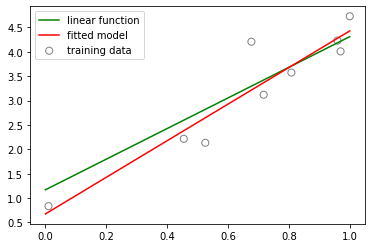

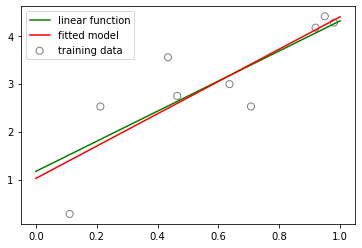

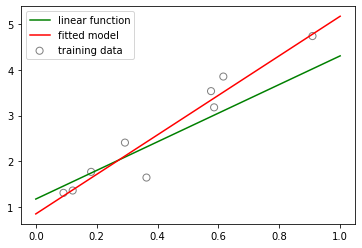

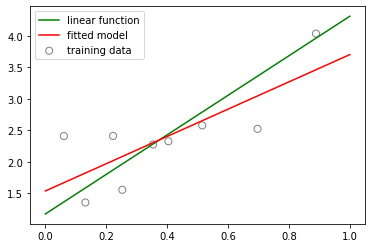

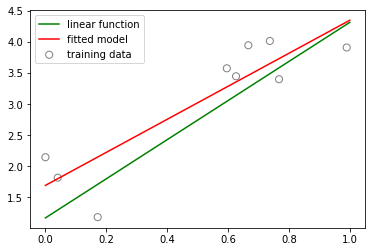

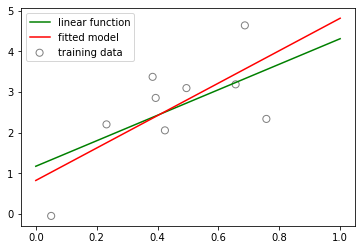

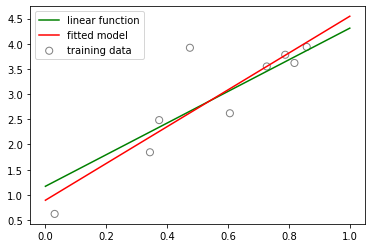

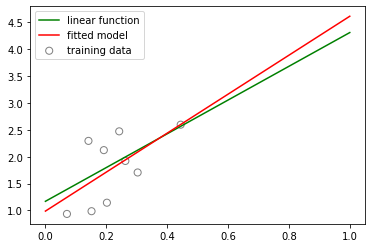

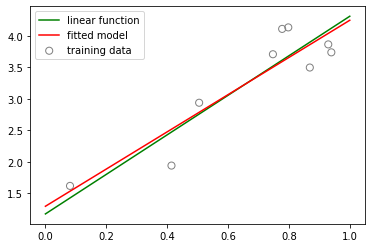

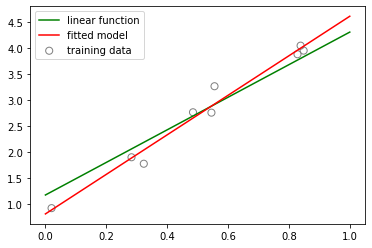

In [ ]:
for start in np.arange(0, size-1, 10):
  stop = start + 9

  x_train = x_shuffled[start:stop]
  y_train = y_shuffled[start:stop]

  plt.scatter(x_train, y_train, facecolor = 'none', edgecolors = 'gray', s = 50, label = 'training data')
  plt.plot(x_predict, y_true, c = 'g', label = 'linear function')

  feature = PolynomialFeatures(degree = 1)
  X_train = feature.fit_transform(x_train)
  X_predict = feature.fit_transform(x_predict)

  model = LinearRegression(fit_intercept = False)
  model.fit(X_train, y_train)
  y_predict = model.predict(X_predict)

  plt.plot(x_predict, y_predict, c = 'r', label = 'fitted model')
  plt.legend()
  plt.show()


## Az már most látható,

hogy ha kis mértékben is de az egyes minták esetében eltérő a modell,<br>
holott ugyan abból a sokaságból válaszottuk ki őket.

Hogy pontosan lássuk mekkora az eltérés az egyes modellek között, most<br>
nézzük meg az egyes mintákra illesztett modelleket egy ábrán.

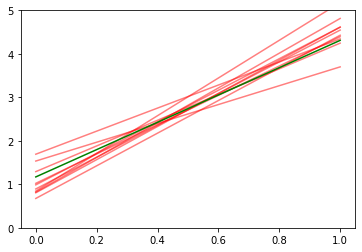

In [ ]:
skip = 10

for start in np.arange(0, size-1, skip):
  stop = start + (skip - 1)

  x_train = x_shuffled[start:stop]
  y_train = y_shuffled[start:stop]

  feature = PolynomialFeatures(degree = 1)
  X_train = feature.fit_transform(x_train)
  X_predict = feature.fit_transform(x_predict)

  model = LinearRegression(fit_intercept = False)
  model.fit(X_train, y_train)
  y_predict = model.predict(X_predict)

  plt.plot(x_predict, y_predict, c = 'r', label = 'model', alpha = 0.5)
  plt.ylim(bottom = 0.0, top = 5.0)

plt.plot(x_predict, y_true, c = 'g', label = 'linear function')
plt.show()

## Haladjuk egy lépéssel tovább

és tegyük fel, mi lenne akkor, ha a végső következtetésünket arra vonatkozólag,<br>
hogyan is néz ki a modell a több apró mintából vett modellek átlagából vonnánk le?

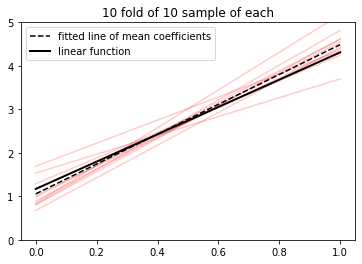

In [ ]:
coef = []

skip = 10

for start in np.arange(0, size-1, skip):
  stop = start + (skip - 1)

  x_train = x_shuffled[start:stop]
  y_train = y_shuffled[start:stop]

  feature = PolynomialFeatures(degree = 1)
  X_train = feature.fit_transform(x_train)
  X_predict = feature.fit_transform(x_predict)

  model = LinearRegression(fit_intercept = False)
  model.fit(X_train, y_train)
  coef.append(model.coef_)
  y_predict = model.predict(X_predict)

  plt.plot(x_predict, y_predict, c = 'r', alpha = 0.2)
  plt.ylim(bottom = 0.0, top = 5.0)

coefficients = np.array(coef)
mean_coefficient = np.mean(np.squeeze(coefficients), 0)

model.coef_ = mean_coefficient    # felülirjuk a modell coeficienst ami alapján az aggregált modelt kirajzoltatjuk
y_predict_mean = model.predict(X_predict)

plt.plot(x_predict, y_predict_mean, '--', c = 'black', label = 'fitted line of mean coefficients')
plt.plot(x_predict, y_true, linewidth = 2, c = 'black', label = 'linear function')
plt.title('10 fold of 10 sample of each')
plt.legend()
plt.show()

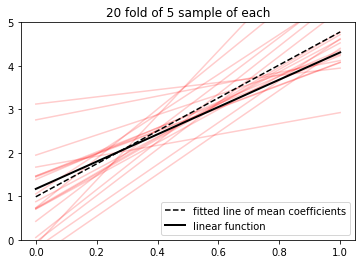

In [ ]:
coef = []

skip = 5

for start in np.arange(0, size-1, skip):
  stop = start + (skip - 1)

  x_train = x_shuffled[start:stop]
  y_train = y_shuffled[start:stop]

  feature = PolynomialFeatures(degree = 1)
  X_train = feature.fit_transform(x_train)
  X_predict = feature.fit_transform(x_predict)

  model = LinearRegression(fit_intercept = False)
  model.fit(X_train, y_train)
  coef.append(model.coef_)
  y_predict = model.predict(X_predict)

  plt.plot(x_predict, y_predict, c = 'r', alpha = 0.2)
  plt.ylim(bottom = 0.0, top = 5.0)

coefficients = np.array(coef)
mean_coefficient = np.mean(np.squeeze(coefficients), 0)

model.coef_ = mean_coefficient    # felülirjuk a modell coeficienst ami alapján az aggregált modelt kirajzoltatjuk
y_predict_mean = model.predict(X_predict)

plt.plot(x_predict, y_predict_mean, '--', c = 'black', label = 'fitted line of mean coefficients')
plt.plot(x_predict, y_true, linewidth = 2, c = 'black', label = 'linear function')
plt.title('20 fold of 5 sample of each')
plt.legend()
plt.show()

## Összefoglalás

Amit fent láttunk, több mintán végzett illesztés alapján csiánltunk egy olyan illesztést<br>
vagy más néven modelt, amelyet az ábrán szaggatott fekete vonallal jelöltünk.

A téma természetesen sokkal nagyobb mint amennyit ebből itt és most ki tudok<br>
fejteni, de röviden összefoglalva a szakirodalomban **K-fold cross validation**
néven<br>
található meg.

In [ ]:
coef

[array([[2.75736587, 1.36457159]]),
 array([[-0.19350932,  4.81573688]]),
 array([[-0.4232993,  4.8255059]]),
 array([[0.73069698, 4.04746611]]),
 array([[0.05332043, 5.50385422]]),
 array([[0.73363011, 5.68189566]]),
 array([[1.67111782, 1.2542027 ]]),
 array([[1.46440039, 2.77276114]]),
 array([[1.94642998, 2.31830701]]),
 array([[3.12118937, 0.8268953 ]]),
 array([[1.44446622, 2.63134772]]),
 array([[-0.10932371,  7.42262427]]),
 array([[0.70543419, 3.82291766]]),
 array([[1.38680741, 2.96869591]]),
 array([[1.05447123, 4.58241138]]),
 array([[0.42481134, 5.28478849]]),
 array([[-0.05076955,  5.33827876]]),
 array([[1.46709091, 2.614978  ]]),
 array([[0.71208566, 4.00563773]]),
 array([[0.87653482, 3.73037936]])]

In [ ]:
mean_coefficient

array([0.98864754, 3.79066279])

## Ezzel szemben most bontsuk szét az eseteket Tanuló és Teszt mintára

Miután a modelt a tanuló adatokon álítottuk elő, mérjük meg a modell álltal előállított becslés (közelítés) és a valós adatok közöti eltérést, ebben az esetben az egyes mérési hibák négyzetösszegének átlagát (erről később még bővebben) és mérjük meg ezt az értéket a Teszt mintán is.

Fontos fogalmi tisztázás, hogy Tanuló mintának vagy Tanuló adatoknak nevezem az adatoknak azt a halmazát amelyen a modelt előállítom. Teszt adatoknak hívom a teljes adathalmaz azon részét, amelyet nem használok fel a modell előállításához.

Ezt a Teszt adathalmazt használom fel az modell validálásására - vagyis arra, hogy a modell milyen mértékben általánosítható. Sikerült-e úgy megragadni a bemeneti változó(k) és a célváltozó közötti összefüggést úgy, hogy az általánosítható legyen.

Mindennek az az egyik célja, hogy a modellünk álltal előállítható becslés később olyan adatokra is alkalmazni tudjuk amelyek modell előállításának pillanatában még nem ismertek, illetve nem ismert magának a célváltozónak az értéke.

De erről később még bővebben írok. Most nézzük meg a technikai lépéseket.


In [ ]:
size = 50

sigma = 0.6

x, y = create_data(linear_function, size, sigma)

x_generating = np.linspace(0, 1, 50).reshape(-1, 1)

y_generating = linear_function(x_generating)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

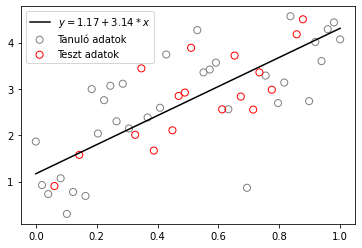

In [ ]:
plt.scatter(x_train, y_train, facecolor = 'none', edgecolors = 'gray', s = 50, label = 'Tanuló adatok')
plt.scatter(x_test, y_test, facecolor = 'none', edgecolors = 'r', s = 50, label = 'Teszt adatok')

plt.plot(x_generating, y_generating, c = 'black', label = '$y = 1.17 + 3.14 * x$')

plt.legend()
plt.show()

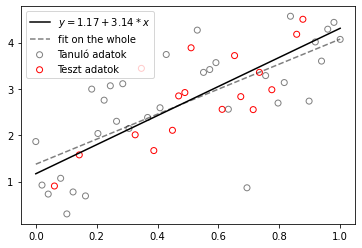

In [ ]:
feature = PolynomialFeatures(degree = 1)

X_train = feature.fit_transform(x_train)
X_test = feature.fit_transform(x_test)
X_predict = feature.fit_transform(x_generating)

model = LinearRegression(fit_intercept = False)
model.fit(X_train, y_train)

y_predict = model.predict(X_predict)

y_predict_train = model.predict(X_train)
y_predict_test  = model.predict(X_test)

plt.scatter(x_train, y_train, facecolor = 'none', edgecolors = 'gray', label = 'Tanuló adatok')
plt.scatter(x_test, y_test, facecolor = 'none', edgecolor = 'r', label = 'Teszt adatok')

plt.plot(x_generating, y_generating, c = 'black', label = '$y = 1.17 + 3.14 * x$')
plt.plot(x_generating, y_predict, '--', c = 'black', label = 'fit on the whole', alpha = 0.5)
plt.legend()
plt.show()

## Miből adódik a különbség?

Látható, hogy a valós $y = 1.17 + 3.14 * x$ és ugyan ennek a fügvénynek a zajjal $~N(0,0.6)$ eloszlással módosított változatának modellünk által becsült értéke között van némi eltérés.

## Ami ennél sokkal érdekesebb

Hogy a model álltal az adatokból számolt becslés és tényleges adatok között mekkora az eltérés.

Nevezzük ezt most az egyszerűség kedvéért - az angol kifejezés alapján -
root mean squar error-nak.

Root mean squared error (RMSE) = $\sqrt{\frac{1}{n}\sum_{t=1}^{n}error_t^2}$

Kicsit még pontosabban az adott megfigyelés és a hozzá tartozó becslés közötti különbség négyzetének gyöke

Root mean squared error RMSE = $\sqrt{\frac{1}{n}\sum_{t=1}^{n}(y_t - ypred_t)^2}$

In [ ]:
mean_squared_error(y, y_predict)

0.5838811901214099

In [ ]:
mean_squared_error(y_train, y_predict_train)

0.6948667851294953

In [ ]:
mean_squared_error(y_test, y_predict_test)

0.3684385645174797